In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
picher_df = pd.read_csv("https://raw.githubusercontent.com/bigdataleeky/python/main/data/%ED%88%AC%EC%88%98_2017.csv")
batter_df = pd.read_csv("https://raw.githubusercontent.com/bigdataleeky/python/main/data/%ED%83%80%EC%9E%90_2017.csv")

In [4]:
picher_df.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


In [5]:
batter_df.head()

,선수명,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,...,도루,BABIP,타율,출루율,장타율,OPS,wOBA,WAR,연봉(2018),연봉(2017)
0,최정,SK,130,527,430,136,46,89,113,70,...,1,0.316,0.316,0.427,0.684,1.111,0.442,7.30,120000,120000
1,최형우,KIA,142,629,514,176,26,98,120,96,...,0,0.362,0.342,0.450,0.576,1.026,0.430,7.20,150000,150000
2,박건우,두산,131,543,483,177,20,91,78,41,...,20,0.39,0.366,0.424,0.582,1.006,0.424,7.04,37000,19500
3,나성범,NC,125,561,498,173,24,103,99,48,...,17,0.413,0.347,0.415,0.584,0.999,0.416,5.64,43000,35000
4,손아섭,롯데,144,667,576,193,20,113,80,83,...,25,0.374,0.335,0.420,0.514,0.934,0.398,5.60,150000,65000


In [6]:
picher_df.shape, batter_df.shape

((152, 22), (191, 21))

In [7]:
#현재 OS에 설치되어 있는 폰트
import matplotlib as mpl
sorted(set([i.name for i in mpl.font_manager.fontManager.ttflist]))
mpl.rc('font',family='HYGothic-Extra')

In [8]:
picher_df['연봉(2018)'].describe()

count       152.000000
mean      18932.236842
std       30940.732924
min        2700.000000
25%        4000.000000
50%        7550.000000
75%       18500.000000
max      230000.000000
Name: 연봉(2018), dtype: float64

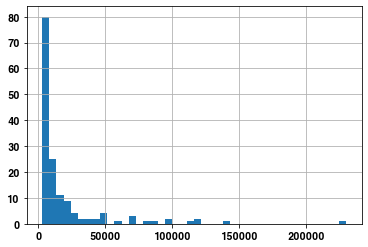

In [9]:
picher_df['연봉(2018)'].hist(bins='auto')
plt.show()

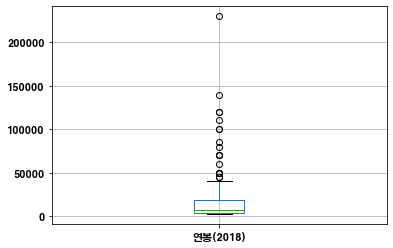

In [10]:
picher_df.boxplot(column=['연봉(2018)'])
plt.show()

In [11]:
picher_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   선수명       152 non-null    object 
 1   팀명        152 non-null    object 
 2   승         152 non-null    int64  
 3   패         152 non-null    int64  
 4   세         152 non-null    int64  
 5   홀드        152 non-null    int64  
 6   블론        152 non-null    int64  
 7   경기        152 non-null    int64  
 8   선발        152 non-null    int64  
 9   이닝        152 non-null    float64
 10  삼진/9      152 non-null    float64
 11  볼넷/9      152 non-null    float64
 12  홈런/9      152 non-null    float64
 13  BABIP     152 non-null    float64
 14  LOB%      152 non-null    float64
 15  ERA       152 non-null    float64
 16  RA9-WAR   152 non-null    float64
 17  FIP       152 non-null    float64
 18  kFIP      152 non-null    float64
 19  WAR       152 non-null    float64
 20  연봉(2018)  152 non-null    int64 

In [12]:
picher_df2 =  picher_df.iloc[:,2:-2]
picher_df2.head()

,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR
0,16,7,0,0,0,30,30,190.0,8.95,2.13,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62
1,11,11,1,0,0,30,29,185.1,7.43,1.85,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08
2,20,6,0,0,0,31,31,193.1,7.36,2.09,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64
3,10,7,0,0,0,28,28,175.2,8.04,1.95,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63
4,13,7,0,0,0,30,30,187.1,7.49,2.11,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38


In [13]:
# 상관관계 값을 보고 값이 커서 상관지수 높은 피처들은 하나만 선택한다.
picher_df3 = picher_df2.drop(columns=["이닝",'선발','패','WAR','RA9-WAR','FIP','홈런/9','경기','ERA'])
# picher_df3 = picher_df2
picher_df3.corr()


,승,세,홀드,블론,삼진/9,볼넷/9,BABIP,LOB%,kFIP
승,1.000000,0.053747,0.092872,0.105281,0.078377,-0.404710,-0.171111,0.131178,-0.314159
세,0.053747,1.000000,0.112716,0.605229,0.170436,-0.131394,-0.089212,0.167557,-0.225259
홀드,0.092872,0.112716,1.000000,0.490076,0.186790,-0.146806,-0.104307,0.048123,-0.237353
블론,0.105281,0.605229,0.490076,1.000000,0.188423,-0.137019,-0.112480,0.100633,-0.237815
삼진/9,0.078377,0.170436,0.186790,0.188423,1.000000,0.109345,0.457523,-0.071284,-0.317594
볼넷/9,-0.404710,-0.131394,-0.146806,-0.137019,0.109345,1.000000,0.276009,-0.150837,0.605008
BABIP,-0.171111,-0.089212,-0.104307,-0.112480,0.457523,0.276009,1.000000,-0.505478,0.166910
LOB%,0.131178,0.167557,0.048123,0.100633,-0.071284,-0.150837,-0.505478,1.000000,-0.269536
kFIP,-0.314159,-0.225259,-0.237353,-0.237815,-0.317594,0.605008,0.166910,-0.269536,1.000000


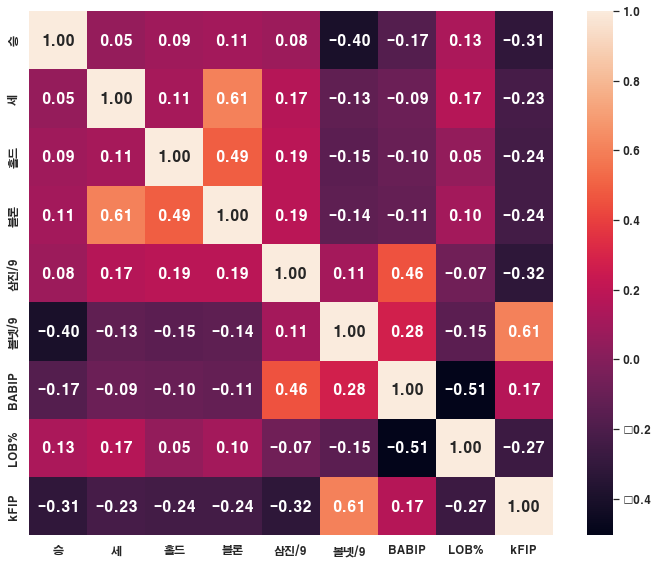

In [14]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(10,8)})
plt.rc('font',family='HYGothic-Extra')
sns.heatmap(
    picher_df3.corr(),
    annot_kws={'size':15},
    fmt='.2f',
    cbar=True,
    annot=True,
    square=True   
)
plt.tight_layout()
plt.show()

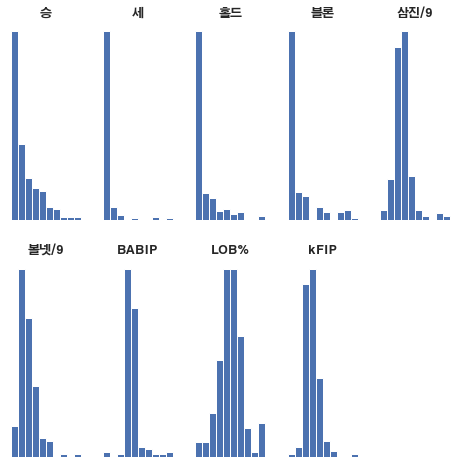

In [15]:
# 각 컬럼들에 대한 히스토그램을 그려서 데이터의 분포를 살펴본다.
row = 0
if len(picher_df3.columns)%5 == 0:
    row = len(picher_df3.columns)//5
else:
    row = len(picher_df3.columns)//5 + 1
    
fix, axs = plt.subplots(row,  5, figsize=(8,8))
for i in range(len(picher_df3.columns)):
    axs[i//5,i%5].hist( picher_df3.iloc[:,i])
    axs[i//5,i%5].set_title(picher_df3.columns[i])
    axs[i//5,i%5].axis('off')
axs[1,4].axis('off')

plt.show()    
  

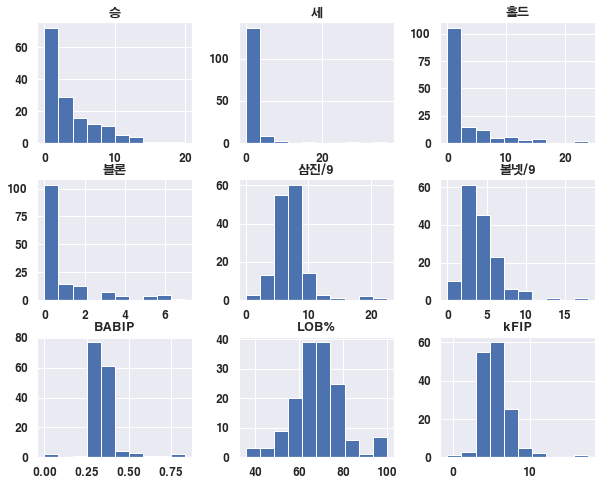

In [16]:
picher_df3.hist()
plt.show()

In [17]:
# 피처들을 정리..
picher_df3.head()

,승,세,홀드,블론,삼진/9,볼넷/9,BABIP,LOB%,kFIP
0,16,0,0,0,8.95,2.13,0.342,73.7,3.44
1,11,1,0,0,7.43,1.85,0.319,67.1,3.41
2,20,0,0,0,7.36,2.09,0.332,72.1,3.82
3,10,0,0,0,8.04,1.95,0.298,75.0,4.03
4,13,0,0,0,7.49,2.11,0.323,74.1,4.31


In [18]:
# 데이터 표준화
from sklearn.preprocessing import StandardScaler
X = picher_df3
Y = picher_df['연봉(2017)']
ss = StandardScaler()
X = ss.fit_transform(X)
X.shape, Y.shape

((152, 9), (152,))

In [19]:
X[:10]

array([[ 3.32457765e+00, -3.07464977e-01, -5.87641430e-01,
        -5.45388887e-01,  6.74320667e-01, -8.71872532e-01,
         1.68382356e-02,  4.48091039e-01, -1.06162315e+00],
       [ 2.02618144e+00, -9.88280283e-02, -5.87641430e-01,
        -5.45388887e-01,  1.34976186e-01, -9.90766781e-01,
        -2.42485428e-01, -1.23169516e-01, -1.07681252e+00],
       [ 4.36329461e+00, -3.07464977e-01, -5.87641430e-01,
        -5.45388887e-01,  1.10137953e-01, -8.88857425e-01,
        -9.59111834e-02,  3.09603632e-01, -8.69224568e-01],
       [ 1.76650220e+00, -3.07464977e-01, -5.87641430e-01,
        -5.45388887e-01,  3.51423642e-01, -9.48304549e-01,
        -4.79259208e-01,  5.60612058e-01, -7.62899034e-01],
       [ 2.54553993e+00, -3.07464977e-01, -5.87641430e-01,
        -5.45388887e-01,  1.56266099e-01, -8.80364978e-01,
        -1.97385661e-01,  4.82712891e-01, -6.21131655e-01],
       [ 1.24714372e+00, -3.07464977e-01, -5.87641430e-01,
        -5.45388887e-01,  1.31427867e-01, -1.037475

In [20]:
# 머신러닝 모델을 선택하고 적용
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_target,y_train,y_target = train_test_split(X,Y,test_size=0.2, random_state=42)
x_train.shape,x_target.shape,y_train.shape,y_target.shape

((121, 9), (31, 9), (121,), (31,))

In [22]:
lr =  LinearRegression()
model = lr.fit(x_train,y_train)

In [23]:
model.score(x_train,y_train), model.score(x_target,y_target)

(0.4685047282390621, 0.34628316747729493)

In [24]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
y_train_predict =  model.predict(x_train)
y_target_predict =  model.predict(x_target)
r2_score(y_target,y_target_predict), mean_squared_error(y_target,y_target_predict)

(0.34628316747729493, 221326316.24826124)

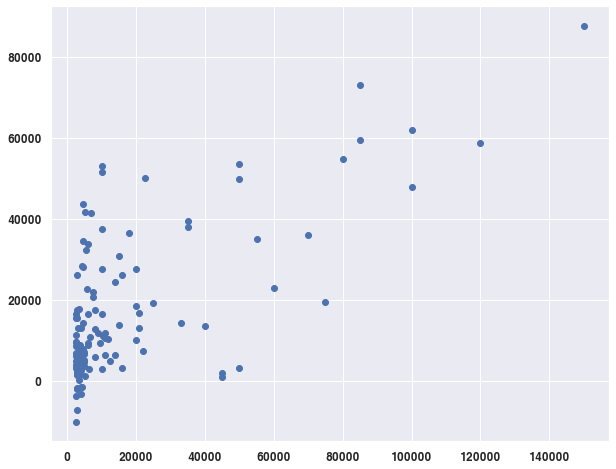

In [25]:
# 실제 2017년도의 연봉 y_train, y_target
plt.scatter(y_train, y_train_predict)
plt.show()

In [26]:
# 수치가 너무 안나와서... 기존의 피처들의 재 구성을 고려해 보아야 한다.
#1. 정규분포형태를 띠는 컬럼들만 모아서.
#2. 팀 정보.....  숫자만으로 이루어진 데이터를 스케일링하고. + 팀 정보를 one hot 으로 변경하고 합친 데이터를 사용한다.
#3. 팀 정보 + 2017년도 연봉....

In [27]:
#1 
picher_df3.columns
#picher_df3.loc[['삼진/9', '볼넷/9','LOB%', 'kFIP']]

Index(['승', '세', '홀드', '블론', '삼진/9', '볼넷/9', 'BABIP', 'LOB%', 'kFIP'], dtype='object')

In [28]:
picher_df3.loc[:,['삼진/9', '볼넷/9','LOB%', 'kFIP']]
# 데이터 표준화
from sklearn.preprocessing import StandardScaler
X = picher_df3.loc[:,['삼진/9', '볼넷/9','LOB%', 'kFIP']]
Y = picher_df['연봉(2017)']
ss = StandardScaler()
X = ss.fit_transform(X)
x_train,x_target,y_train,y_target = train_test_split(X,Y,test_size=0.2, random_state=42)
x_train.shape,x_target.shape,y_train.shape,y_target.shape
lr =  LinearRegression()
model = lr.fit(x_train,y_train)
model.score(x_train,y_train), model.score(x_target,y_target)

(0.15560795833527574, -0.22711727342518606)

In [29]:
# 편차가 심한 데이터..... 는 데이터를 어떻게 보정을 하는지? 어떤 알고리즘을 사용하는지 --> 연구...

In [30]:
# 2번 방법 적용  팀정보를 포함
picher_df['팀명']

0       SK
1       LG
2      KIA
3       LG
4       롯데
      ... 
147     한화
148    KIA
149     롯데
150     삼성
151     KT
Name: 팀명, Length: 152, dtype: object

In [31]:
# ont hot enncording
dumy = pd.get_dummies(picher_df['팀명'])
type(dumy)

pandas.core.frame.DataFrame

In [32]:
ss = StandardScaler()

picher_df2 = ss.fit_transform(picher_df2)
picher_df4 = pd.DataFrame( picher_df2).join(dumy)

X = picher_df4
Y = picher_df['연봉(2017)']

x_train,x_target,y_train,y_target = train_test_split(X,Y,test_size=0.2, random_state=42)
lr =  LinearRegression()
model = lr.fit(x_train,y_train)
model.score(x_train,y_train), model.score(x_target,y_target)

(0.6034929822515469, 0.4578062928280333)

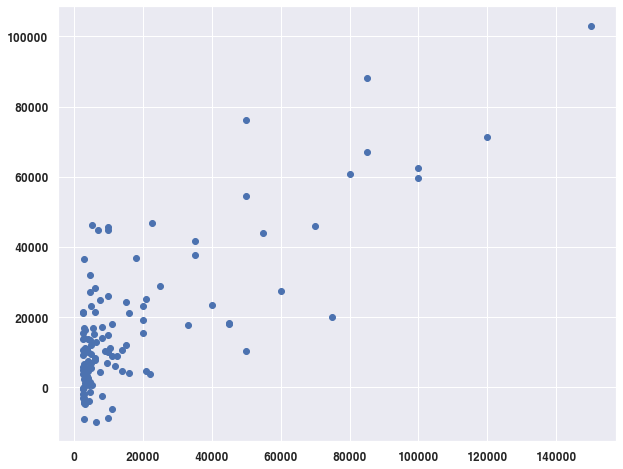

In [33]:
# 실제 2017년도의 연봉 y_train, y_target
y_train_predict = model.predict(x_train)
plt.scatter(y_train, y_train_predict)
plt.show()

In [34]:
r2_score(y_train,y_train_predict)

0.6034929822515469

In [47]:
# 3번째 방법
# 2017년도 연봉을 반영
picher_df.columns

Index(['선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)'],
      dtype='object')

In [52]:
picher_df4 = picher_df.drop(columns=['선수명','연봉(2018)'])
picher_df4.head()

,팀명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2017)
0,SK,16,7,0,0,0,30,30,190.0,8.95,2.13,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,85000
1,LG,11,11,1,0,0,30,29,185.1,7.43,1.85,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,50000
2,KIA,20,6,0,0,0,31,31,193.1,7.36,2.09,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,150000
3,LG,10,7,0,0,0,28,28,175.2,8.04,1.95,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000
4,롯데,13,7,0,0,0,30,30,187.1,7.49,2.11,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,85000


In [53]:
teamname = picher_df.columns[1]
temp = pd.get_dummies(picher_df4[teamname])
picher_df4.drop(columns=[teamname],inplace=True)
ss = StandardScaler()
picher_df5 = ss.fit_transform(picher_df4)
type(picher_df5)

numpy.ndarray

In [55]:
picher_df5 =  pd.DataFrame(picher_df5).join(temp)
picher_df5.head()

,0,1,2,3,4,5,6,7,8,9,...,18,KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,3.324578,1.231202,-0.307465,-0.587641,-0.545389,0.059630,2.460174,2.653920,0.674321,-0.871873,...,2.743746,0,0,0,0,1,0,0,0,0
1,2.026181,2.513001,-0.098828,-0.587641,-0.545389,0.059630,2.357272,2.556178,0.134976,-0.990767,...,1.341724,0,0,1,0,0,0,0,0,0
2,4.363295,0.910752,-0.307465,-0.587641,-0.545389,0.111423,2.563077,2.715757,0.110138,-0.888857,...,5.347500,1,0,0,0,0,0,0,0,0
3,1.766502,1.231202,-0.307465,-0.587641,-0.545389,-0.043956,2.254370,2.358699,0.351424,-0.948305,...,3.344612,0,0,1,0,0,0,0,0,0
4,2.545540,1.231202,-0.307465,-0.587641,-0.545389,0.059630,2.460174,2.596072,0.156266,-0.880365,...,2.743746,0,0,0,0,0,0,1,0,0


In [122]:
# 데이터 분리
x_train,x_target,y_train,y_target =  train_test_split(picher_df5,picher_df['연봉(2018)'])

In [123]:
lr = LinearRegression()
model = lr.fit(x_train,y_train)

In [124]:
model.score(x_train,y_train), model.score(x_target,y_target)

(0.9291392747655071, 0.8892336461131455)

In [90]:
y_target_predict = model.predict(x_target)

In [93]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
r2_score(y_target,y_target_predict), mean_squared_error(y_target,y_target_predict)

(0.8114959649626416, 108770688.37189929)

In [110]:
# 교차검증... 데이터의 개수가 많지 않을때 데이터를 부풀리는 방법 Cross Validation 
print(len(picher_df5))
print(len(picher_df5)/5)
print(len(picher_df5)/5*4)

152
30.4
121.6


In [135]:
from sklearn.model_selection import KFold
kfold =  KFold(n_splits=10)
lr = LinearRegression()
result = []
for train_index, test_index in kfold.split(picher_df5):        
    x_train,x_target = picher_df5.iloc[train_index,:], picher_df5.iloc[test_index,:],
    y_train,y_target = picher_df['연봉(2018)'][train_index], picher_df['연봉(2018)'][test_index]
    #print((x_train.shape,y_train.shape),(x_target.shape,y_target.shape))
    model = lr.fit(x_train,y_train)
    y_target_predict =  model.predict(x_target)
    print(model.score(x_train,y_train), model.score(x_target,y_target))
    result.append(r2_score(y_target,y_target_predict))

import numpy as np
print(f"r2_score 평균 : {np.mean(result)}")

0.9227984284395292 0.6246523136482418
0.9231344302545927 0.9270921051824984
0.9310854414995323 0.6856963832640797
0.9441878422973681 -0.23843812522532715
0.9270387909569782 0.6357616163987945
0.9267907627971838 -0.9137497155094672
0.927911565932829 -36.3718317065229
0.9273496431702392 0.49345008662088563
0.9274831281587989 0.7827159767159261
0.9299151336900151 -7.32163625628278
r2_score 평균 : -4.0696287321710045


In [229]:
# 선형회귀의 과적합을 해결하기위해 규제 알고리즘인 릿지, 라쏘
x_train,x_target,y_train,y_target =  train_test_split(picher_df5,picher_df['연봉(2018)'],random_state=42)
from sklearn.linear_model import Lasso
lasso =  Lasso(alpha=0.1,max_iter=10000)
lasso.fit(x_train,y_train)
lasso.score(x_train,y_train), lasso.score(x_target,y_target)

(0.9344216285642581, 0.7379213463352827)

In [336]:
X_train,X_target,Y_train,Y_target =  train_test_split(picher_df5,picher_df['연봉(2018)'])
from sklearn.linear_model import Ridge
ridge =  Ridge(alpha=0.1,max_iter=10000)
ridge.fit(X_train,Y_train)
ridge.score(X_train,Y_train), lasso.score(X_target,Y_target)

(0.9276091957419474, 0.9550281897384891)

In [337]:
print(ridge.coef_)
print(np.argsort(-ridge.coef_)[:10])
top10 = np.argsort(-ridge.coef_)[:10]
picher_df5_top10 =  picher_df5.iloc[:,top10]
picher_df5_top10.head()

[   236.92735011   1242.45666792     46.53892056   -537.82716712
    605.63942745  -5291.04667172 -11721.16394789   9486.5773366
   -775.79393087   2725.82052689   2026.55567624  -1168.71894367
   -575.6487088    -322.38581706   2247.6158131   -3531.99708134
   1514.77718823   9496.2829262   19203.45878946   -784.30414211
    757.92766186   1445.18617594   -507.3664046    2005.76022572
  -5327.55225718   2631.33905311  -3893.21813577   3672.22782302]
[18 17  7 27  9 25 14 10 23 16]


,18,17,7,한화,9,롯데,14,10,SK,16
0,2.743746,4.518029,2.653920,0,-0.871873,0,3.185125,-0.443844,1,-1.061623
1,1.341724,4.108270,2.556178,0,-0.990767,0,3.125265,-0.670731,0,-1.076813
2,5.347500,3.774393,2.715757,0,-0.888857,0,2.983779,-0.414250,0,-0.869225
3,3.344612,3.007992,2.358699,0,-0.948305,0,2.749783,-0.187363,0,-0.762899
4,2.743746,2.818289,2.596072,0,-0.880365,1,2.760666,-0.295875,0,-0.621132


In [338]:
Y_train.iloc[[0,5]]

7     100000
69      3100
Name: 연봉(2018), dtype: int64

In [345]:
from sklearn.model_selection import KFold
kfold =  KFold(n_splits=10)
ridge =  Ridge(alpha=10,max_iter=10000)
result = []
for train_index, test_index in kfold.split(X_train):        
    x_train,x_target = X_train.iloc[train_index,:], X_train.iloc[test_index,:],
    y_train,y_target = Y_train.iloc[train_index], Y_train.iloc[test_index]
    #print((x_train.shape,y_train.shape),(x_target.shape,y_target.shape))
    model = ridge.fit(x_train,y_train)
    y_target_predict =  model.predict(x_target)
    print(model.score(x_train,y_train), model.score(x_target,y_target))
    result.append(r2_score(y_target,y_target_predict))

import numpy as np
print(f"r2_score 평균 : {np.mean(result)}")

0.9151286092975683 0.8973888026219642
0.9181042996819482 0.796075250559333
0.9049598465914872 0.9359724674495785
0.9238405130203303 0.6137723760524669
0.8942330790025262 0.9088923988906189
0.9167545061035314 0.9240487642464251
0.9149580401027555 0.9014732261914995
0.9176489788749207 -1.0345119101489755
0.9262580256794968 0.8306408652709787
0.9341313455218031 0.360096612425295
r2_score 평균 : 0.6133848853559185


In [343]:
picher_df['팀명'].value_counts()

삼성     20
한화     20
KT     19
SK     18
LG     18
KIA    15
두산     15
롯데     14
NC     13
Name: 팀명, dtype: int64

In [346]:
picher_df.columns

Index(['선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)'],
      dtype='object')

In [348]:
# 선수명,팀명,연봉(2018) 제거한후 학습해서. 가중치가 -인 피처들은 제거하고. k-fold / cross validation으로 
# 평균보고 잘나오면 사용하고
# 그렇지 않으면... 여기에 팀 정보도 넣어서 확인하고 
picher_df6 =  picher_df.drop(columns=['선수명','팀명','연봉(2018)'])
from sklearn.linear_model import Ridge
X_train,X_target,Y_train,Y_target =  train_test_split(picher_df6,picher_df['연봉(2018)'],random_state=42)


from sklearn.model_selection import KFold
kfold =  KFold(n_splits=10)
ridge =  Ridge(alpha=10,max_iter=10000)
result = []
for train_index, test_index in kfold.split(X_train):        
    x_train,x_target = X_train.iloc[train_index,:], X_train.iloc[test_index,:],
    y_train,y_target = Y_train.iloc[train_index], Y_train.iloc[test_index]
    #print((x_train.shape,y_train.shape),(x_target.shape,y_target.shape))
    model = ridge.fit(x_train,y_train)
    y_target_predict =  model.predict(x_target)
    print(model.score(x_train,y_train), model.score(x_target,y_target))
    result.append(r2_score(y_target,y_target_predict))

import numpy as np
print(f"r2_score 평균 : {np.mean(result)}")

0.9241591682141065 0.9031278357233624
0.9180402045778375 0.9566270120199865
0.9232429352920326 0.946587380448711
0.9485030336529963 0.25552953374604004
0.9257059248063527 0.8688063843869196
0.9284125601434651 0.8535334971484633
0.9286713868770956 0.867411530742429
0.9242993514406409 0.8367713255664968
0.9270023191023428 0.8584958457315418
0.9195637024561296 0.9717270143424274
r2_score 평균 : 0.831861735985638


In [349]:
ridge =  Ridge(alpha=10,max_iter=10000)
model = ridge.fit(X_train,Y_train)
X_target_predict =  model.predict(X_target)
print(r2_score(Y_target,X_target_predict))

0.8496287265372703


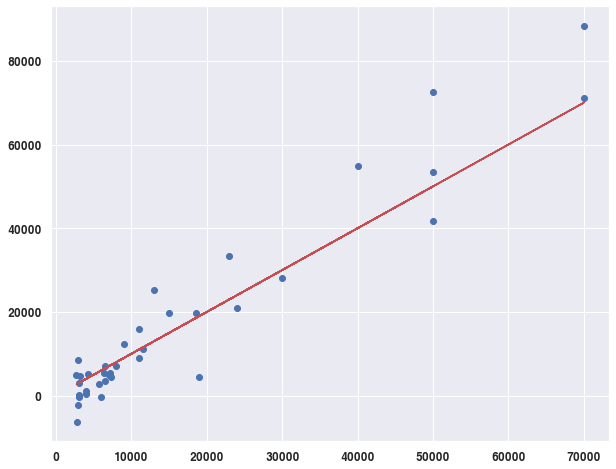

In [354]:
plt.scatter(Y_target,X_target_predict)
plt.plot(Y_target,Y_target,color='r')
plt.show()

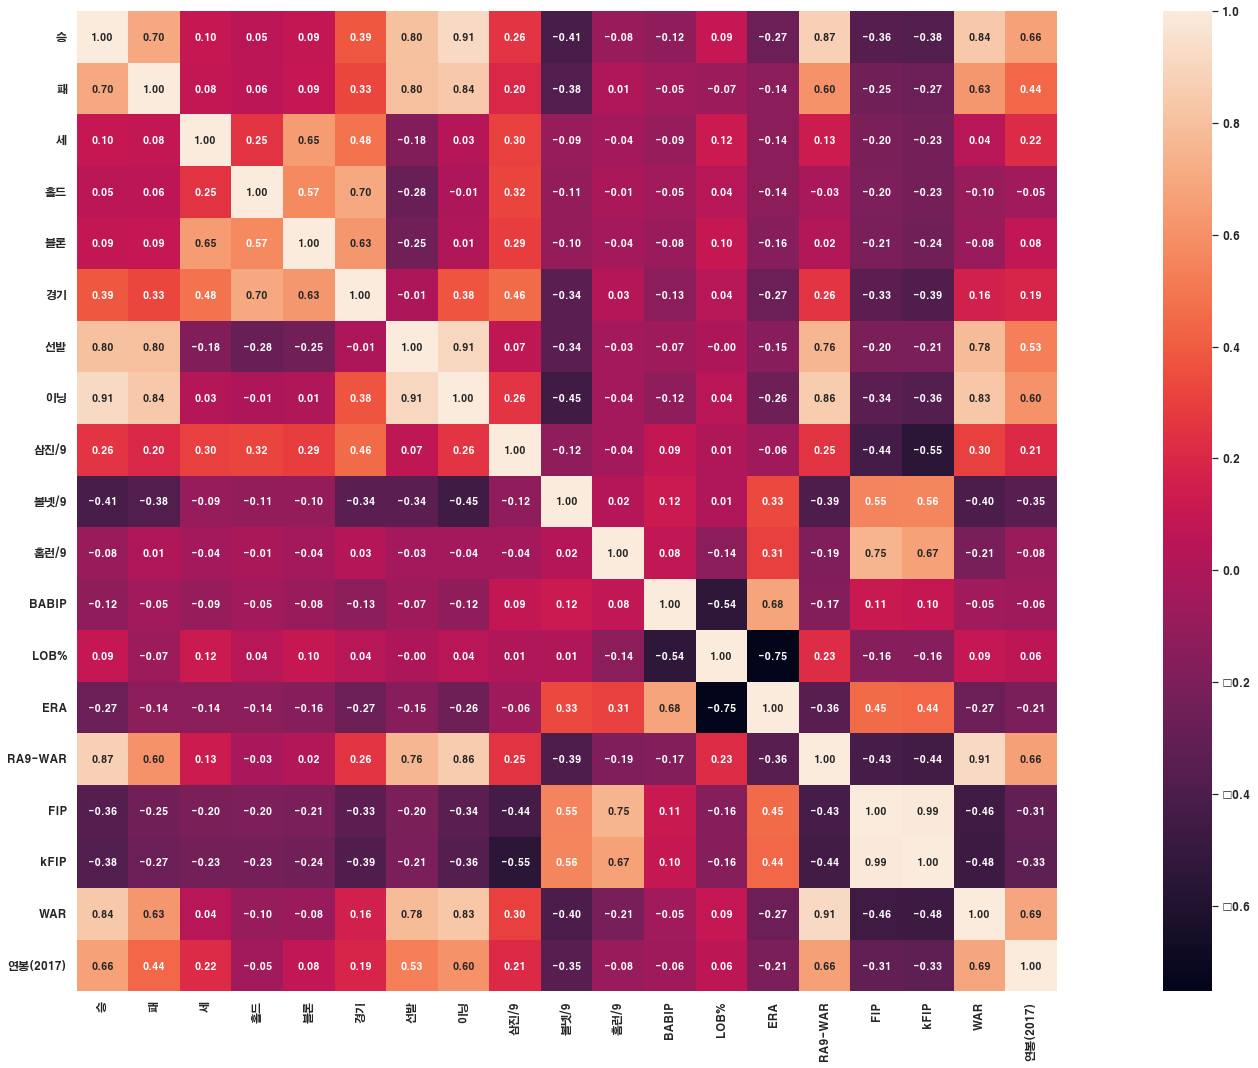

In [360]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(30,15)})
plt.rc('font',family='HYGothic-Extra')
sns.heatmap(
    X_train.corr(),
    annot_kws={'size':10},
    fmt='.2f',
    cbar=True,
    annot=True,
    square=True   
)
plt.tight_layout()
plt.show()